## Options for visualizing wide-form data

wide-form 데이터를 전달하기 위한 옵션은 훨씬 더 유연하다. long-form 데이터와 마찬가지로 이름(때론 인덱스) 정보를 사용할 수 있으므로 pandas객체가 선호된다. 그러나 본질적으로 단일 벡터 또는 벡터 모음으로 볼 수 있는 모든 형식을 데이터로 전달할 수 있으며, 일반적으로 유효한 플롯을 구성할 수 있다.

앞서 데이터는 직사각형 pandas.DataFrame을 사용했다면 이것들은 열의 모음으로 생각할 수 있다. 딕셔너리 또는 pandas 객체 목록도 작동하지만 축 레이블이 손실된다.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [3]:
flights_wide  = flights.pivot(index="year", columns="month", values="passengers")

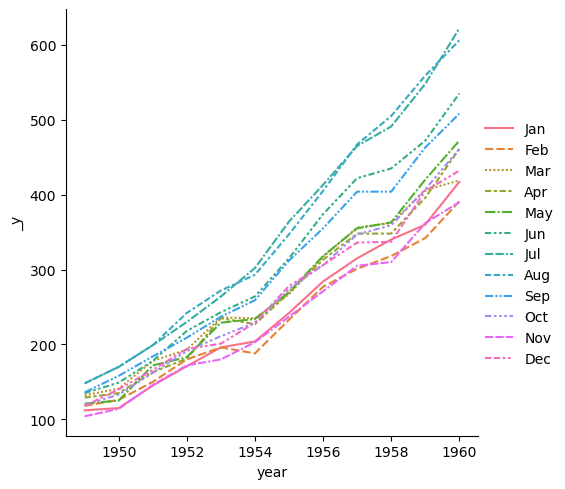

In [5]:
flights_wide_list = [col for _, col, in flights_wide.items()]
sns.relplot(data = flights_wide_list, kind = 'line')

컬렉션의 벡터는 길이가 같을 필요는 없다. 인덱스가 있는 경우 인덱스를 사용하여 정렬한다.

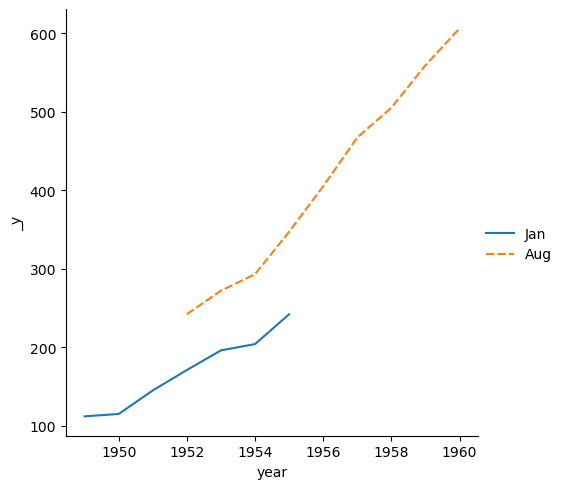

In [7]:
two_series = [flights_wide.loc[:1955, 'Jan'], flights_wide.loc[1952:, 'Aug']]
sns.relplot(data = two_series, kind = 'line')

반면 서수 인덱스는 널판지 배열이나 간단한 배열이나 파이썬 시퀀스에 사용된다

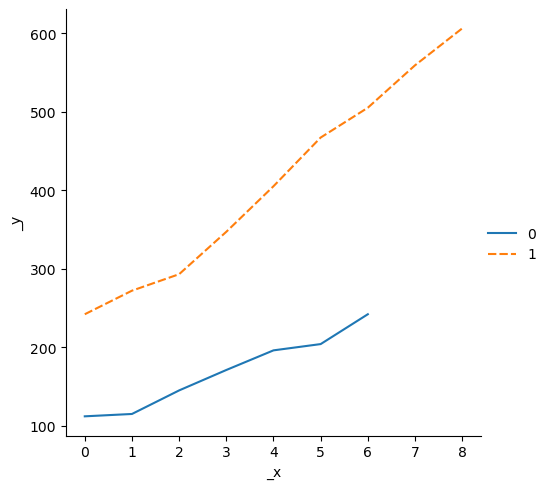

In [8]:
two_arrays = [s.to_numpy() for s in two_series]
sns.relplot(data = two_arrays, kind = 'line')

그러나 이러한 벡터의 사전은 최소한의 키를 사용한다.

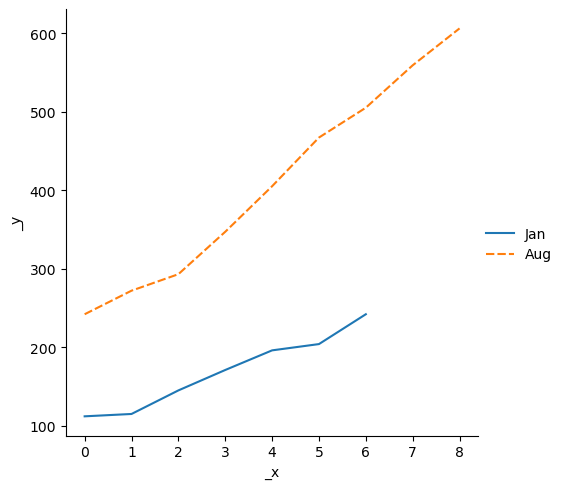

In [9]:
two_arrays_dict = {s.name : s.to_numpy() for s in two_series}
sns.relplot(data = two_arrays_dict, kind = 'line')

직사각형 numpy 배열은 인덱스 정보가 없는 데이터 프레임처럼 취급되므로 열 벡터의 모음으로 볼 수 있다. 이것은 단일 인덱서가 행에 액세스하는 numpy인덱싱 작업의 작동 방시과는 다르다. 하지만 pandas가 배열을 데이터 프레임으로 변환하는 방식이나 matplotlib가 배열을 플롯하는 방식와 일치합니다.

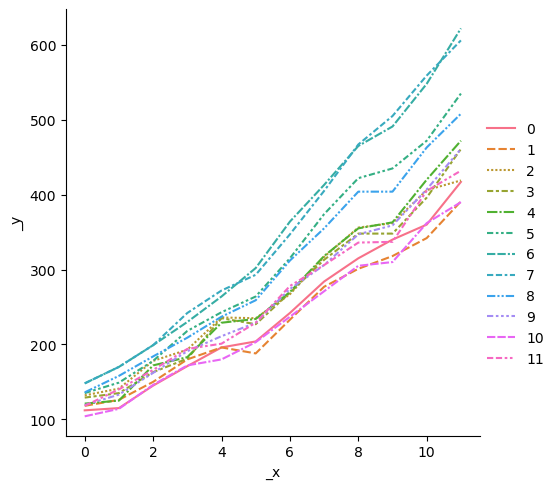

In [12]:
flights_array = flights_wide.to_numpy()
sns.relplot(data=flights_array, kind = 'line')